# Pitch Deck Dataset Data Cleaning

## Import Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import scipy.stats as stats
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import pearsonr

## Import Dataset

In [33]:
df = pd.read_csv('data/falory_clean_links.csv')

## Dataset Size (post cleaning)

In [34]:
print(str(len(df)) + " startups")
print(str(round((len(df)/497)*100,1)) + "% of raw dataset")
df.head()

288 startups
57.9% of raw dataset


,Name,Description,Sector,Business,customer_B2B,customer_B2B2C,customer_B2C,customer_B2G,customer_C2C,Round,...,investor_SPAC,investor_VC,Year,City,State,Country,Geo_Lat,Geo_Long,Links,AmountRaisedEuro
0,Airbnb,Airbnb is an online marketplace for people to ...,2,1,1,0,1,0,0,1,...,0,1,2008,San Francisco,California,United States,37.779026,-122.419906,"['https://airbnb.com/', 'https://www.crunchbas...",636000.0
1,Alan,Alan is a platform that uses technology to mak...,1,3,1,0,0,0,0,4,...,0,1,2020,Paris,Ile-de-France,France,48.853495,2.348391,"['https://alan.com/', 'https://www.crunchbase....",57240000.0
2,Apptopia,Apptopia serves the mobile industry with an ar...,0,1,1,0,0,0,0,2,...,0,1,2018,Boston,Massachusetts,United States,42.355433,-71.060511,"['http://www.apptopia.com/', 'https://www.crun...",1547600.0
3,Beatdapp,Beatdapp provides real-time tracking of media ...,3,0,1,0,0,0,0,1,...,0,1,2019,Vancouver,British Columbia,Canada,49.260872,-123.113952,"['https://beatdapp.com/', 'https://www.crunchb...",2544000.0
4,Bind,"Bind provides personalized, cost-transparent a...",5,1,1,0,1,0,0,2,...,0,1,2018,Minneapolis,Minnesota,United States,44.977300,-93.265469,"['https://www.yourbind.com/', 'https://www.cru...",63600000.0


## Outliers Fixed (prior exploration)

In [35]:
#correcting outliers
#currency_conversion = {
#    'USD': 1.06,
#    'EUR': 1.0,
#    'GBP': 0.86,
#    'CAD': 1.44,
#    'AUSD': 1.30
#}

#round_mapping = {'Pre-Seed': 0, 'Seed': 1, 'Series A': 2, 'Series B': 3, 'Series C': 4, 'Series D': 5, 'Series E': 6, 'Crowdfunding': 8, 'Debt Financing': 9} #'Public': 7

df.loc[df['Name'] == 'Blue Wire', 'Round'] = 1 #seed
df.loc[df['Name'] == 'Blue Wire', 'AmountRaisedEuro'] = 1132075.47 #actual usd seed investment in euro
df.loc[df['Name'] == 'Blue Wire', 'investor_Accelerator'] = 0
df.loc[df['Name'] == 'Blue Wire', 'investor_Angels'] = 0
df.loc[df['Name'] == 'Blue Wire', 'investor_Corporate'] = 0
df.loc[df['Name'] == 'Blue Wire', 'investor_Crowdfunding'] = 0
df.loc[df['Name'] == 'Blue Wire', 'investor_SPAC'] = 0
df.loc[df['Name'] == 'Blue Wire', 'investor_VC'] = 1 # Dot Capital
# https://www.axios.com/2023/08/22/blue-wire-looks-to-raise-1m-community-round

df.loc[df['Name'] == 'Dropbox', 'Round'] = 1 #seed
df.loc[df['Name'] == 'Dropbox', 'AmountRaisedEuro'] = 1132075.47 #actual usd seed investment in euro
df.loc[df['Name'] == 'Dropbox', 'investor_Accelerator'] = 0
df.loc[df['Name'] == 'Dropbox', 'investor_Angels'] = 0
df.loc[df['Name'] == 'Dropbox', 'investor_Corporate'] = 0
df.loc[df['Name'] == 'Dropbox', 'investor_Crowdfunding'] = 0
df.loc[df['Name'] == 'Dropbox', 'investor_SPAC'] = 0
df.loc[df['Name'] == 'Dropbox', 'investor_VC'] = 1 # Sequoia
#https://techcrunch.com/2008/09/04/secretive-storage-company-dropbox-took-sequoia-funding-in-2007/ 1,272,000

df.loc[df['Name'] == 'Snapchat', 'Round'] = 1 #seed
df.loc[df['Name'] == 'Snapchat', 'AmountRaisedEuro'] = 12735849.06 #actual usd seed investment in euro
df.loc[df['Name'] == 'Snapchat', 'investor_Accelerator'] = 0
df.loc[df['Name'] == 'Snapchat', 'investor_Angels'] = 1 #Benchmark’s Mitch Lasky.
df.loc[df['Name'] == 'Snapchat', 'investor_Corporate'] = 0
df.loc[df['Name'] == 'Snapchat', 'investor_Crowdfunding'] = 0
df.loc[df['Name'] == 'Snapchat', 'investor_SPAC'] = 0
df.loc[df['Name'] == 'Snapchat', 'investor_VC'] = 0
#https://techcrunch.com/2013/02/08/snapchat-raises-13-5m-series-a-led-by-benchmark-now-sees-60m-snaps-sent-per-day/

df.loc[df['Name'] == 'Bliinx', 'Round'] = 0 #pre-seed
df.loc[df['Name'] == 'Bliinx', 'AmountRaisedEuro'] = 833333.33 #actual usd seed investment in euro
df.loc[df['Name'] == 'Bliinx', 'investor_Accelerator'] = 0
df.loc[df['Name'] == 'Bliinx', 'investor_Angels'] = 0
df.loc[df['Name'] == 'Bliinx', 'investor_Corporate'] = 0
df.loc[df['Name'] == 'Bliinx', 'investor_Crowdfunding'] = 0
df.loc[df['Name'] == 'Bliinx', 'investor_SPAC'] = 0
df.loc[df['Name'] == 'Bliinx', 'investor_VC'] = 1 #Altair Capital
#https://betakit.com/bliinx-raises-1-million-cad-pre-seed-round-to-help-map-business-relationships-digitally/


df.loc[df['Name'] == 'Supliful', 'Round'] = 1 #pre-seed
df.loc[df['Name'] == 'Supliful', 'AmountRaisedEuro'] = 377358.49 #actual usd seed investment in euro
df.loc[df['Name'] == 'Supliful', 'investor_Accelerator'] = 1
df.loc[df['Name'] == 'Supliful', 'investor_Angels'] = 1
df.loc[df['Name'] == 'Supliful', 'investor_Corporate'] = 0
df.loc[df['Name'] == 'Supliful', 'investor_Crowdfunding'] = 0
df.loc[df['Name'] == 'Supliful', 'investor_SPAC'] = 0
df.loc[df['Name'] == 'Supliful', 'investor_VC'] = 0 
#https://investinlatvia.org/en/news/10-latvian-startups-to-watch-in-2022

df.loc[df['Name'] == 'Adpushup', 'Round'] = 1 #seed
#Adpushup got seed angel investment https://techcrunch.com/2014/10/29/adpushup/
df.loc[df['Name'] == 'Apteo', 'Round'] = 1 #seed
df.loc[df['Name'] == 'Bliinx', 'Round'] = 1 #seed
df.loc[df['Name'] == 'Juked', 'Round'] = 1 #seed
df.loc[df['Name'] == 'POPAPP', 'Round'] = 1 #seed

## Startup Descriptions

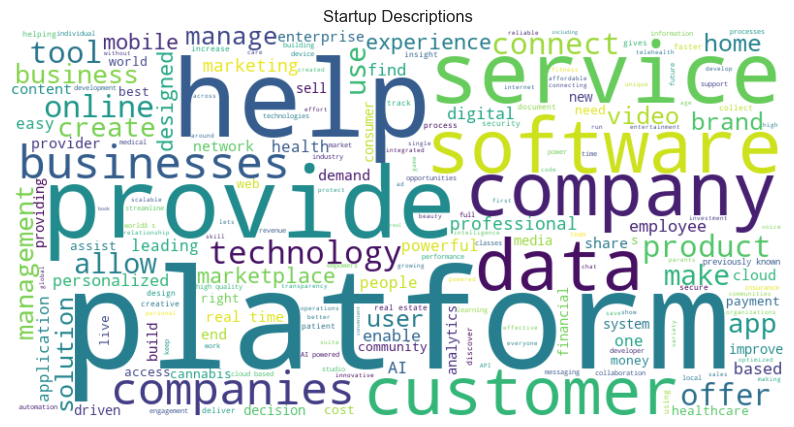

In [36]:
all_description_text = ' '.join(df['Description'])
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_description_text)
# Display the word cloud  
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Startup Descriptions')
plt.show()

## Startups by Sector

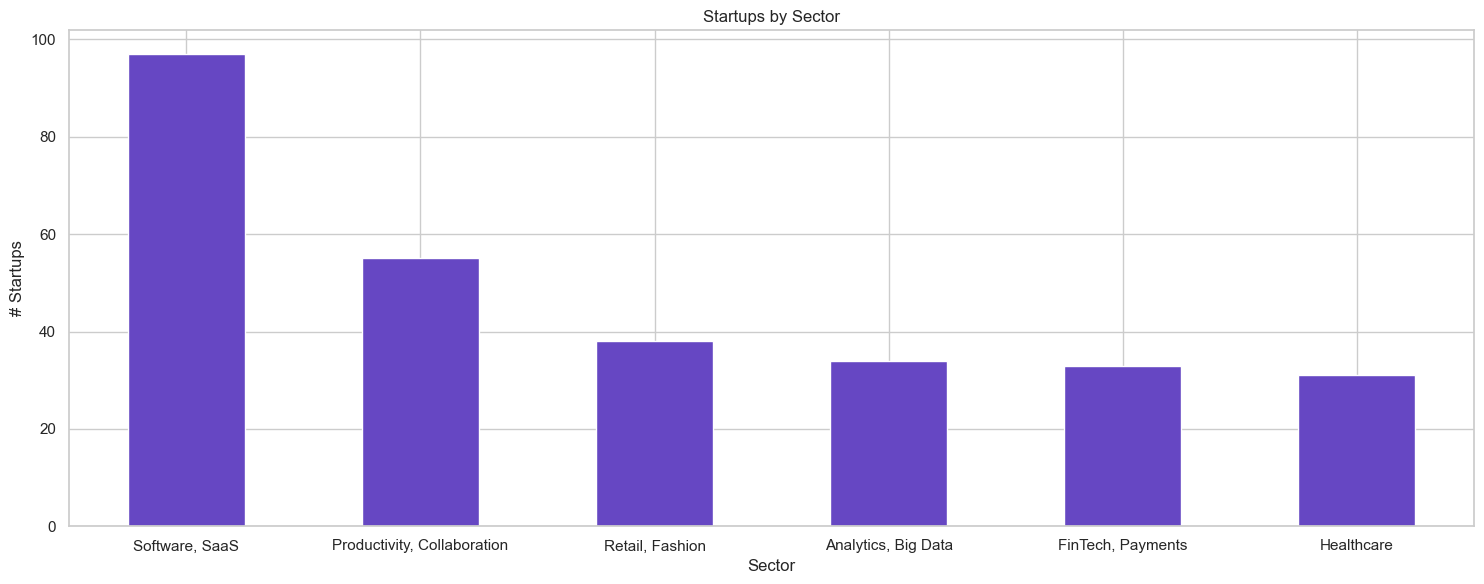

In [37]:
sector_counts = df['Sector'].value_counts()

# Create a bar chart
plt.figure(figsize=(15, 6))
ax = sector_counts.plot(kind='bar', color='#6647c3')

# Set plot labels and title
plt.title('Startups by Sector')
plt.xlabel('Sector')
plt.ylabel('# Startups')

# Wrap x-axis labels for better readability
plt.xticks(rotation=0)  # Set rotation to 0 degrees

# Define your custom text labels
labels = {
    0: 'Analytics, Big Data',
    1: 'FinTech, Payments',
    2: 'Productivity, Collaboration',
    3: 'Software, SaaS',
    4: 'Retail, Fashion',
    5: 'Healthcare'
}

# Set the custom text labels for the x-axis
ax.set_xticklabels([labels[i] for i in sector_counts.index])

# Display the bar chart
plt.tight_layout()
plt.show()


## Startups by Location

288


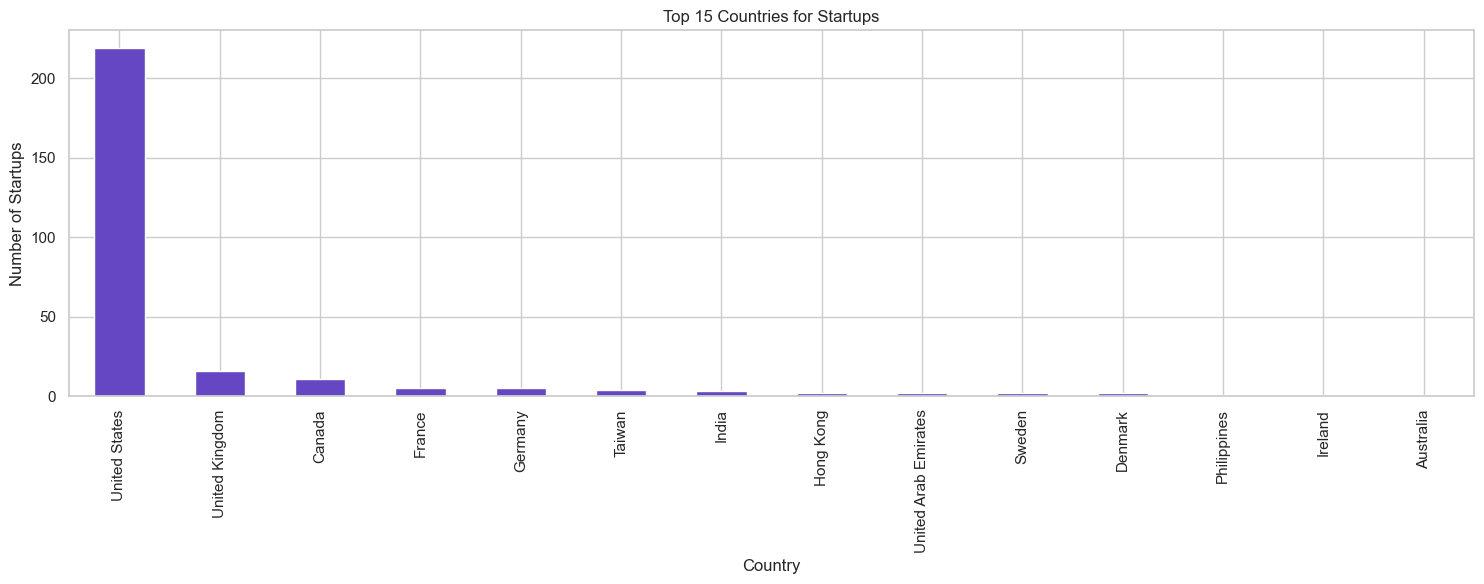

In [38]:
# Group startups by location
location_counts = df['Country'].value_counts()

#plot a bar chart
# Create a bar plot
plt.figure(figsize=(15, 6))
location_counts[0:14].plot(kind='bar', color='#6647c3')
plt.title('Top 15 Countries for Startups')
plt.xlabel('Country')
plt.ylabel('Number of Startups')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
print(len(df))
plt.show()

288


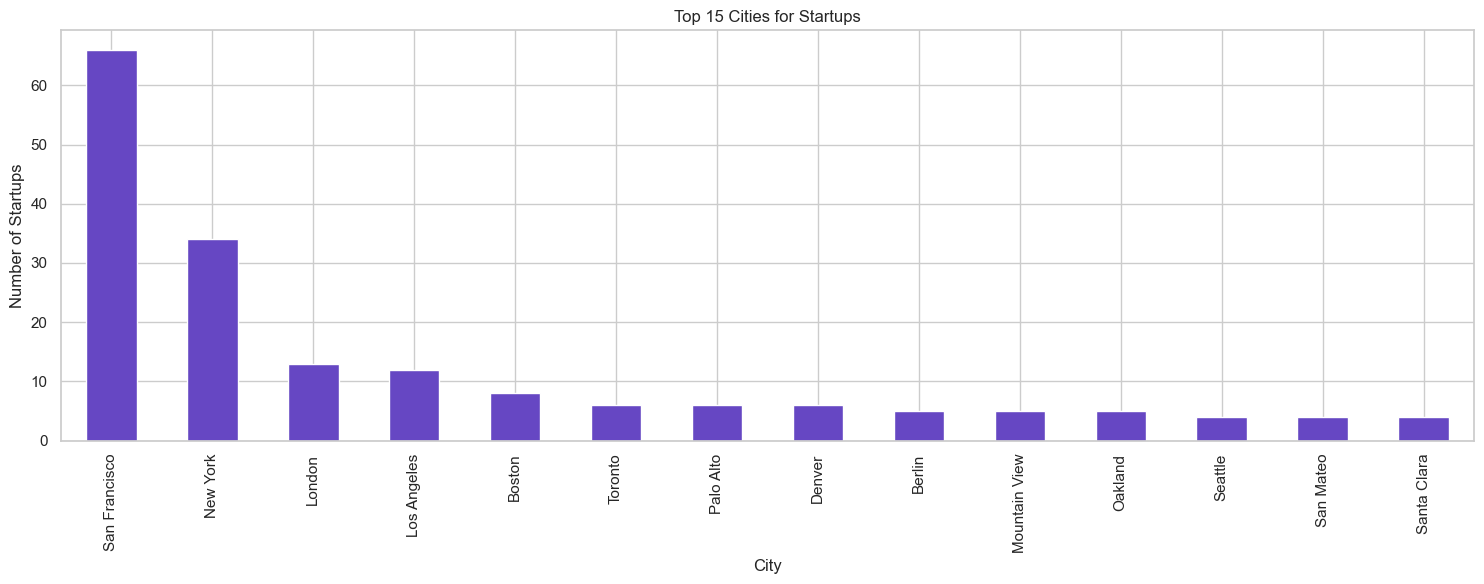

In [39]:
# Group startups by location
location_counts = df['City'].value_counts()

#plot a bar chart
# Create a bar plot
plt.figure(figsize=(15, 6))
location_counts[0:14].plot(kind='bar', color='#6647c3')
plt.title('Top 15 Cities for Startups')
plt.xlabel('City')
plt.ylabel('Number of Startups')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
print(len(df))
plt.show()

Over 70% of startups in this public dataset come from the united states with 24% from San Fancisco. [Link to Interactive Map]('file:///D:/Projects/repos/pitchedit/data/falory_startup_map.html')

## Startups by Amount Raised

C:\Users\newlo\AppData\Local\Temp\ipykernel_10632\2335107774.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([key for key, value in sorted(round_mapping.items(), key=lambda item: item[1])])


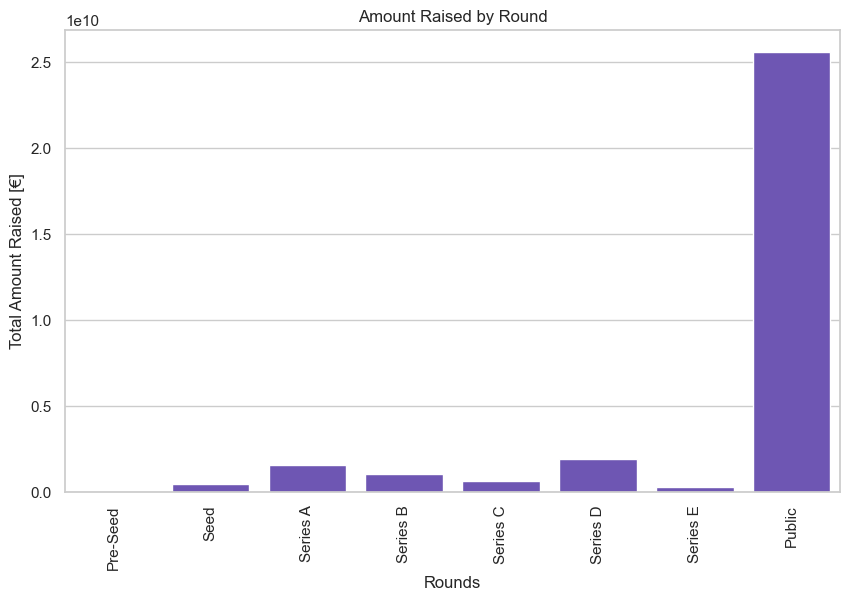

In [40]:
# Define the order of rounds
round_mapping = {'Pre-Seed': 0, 'Seed': 1, 'Series A': 2, 'Series B': 3, 'Series C': 4, 'Series D': 5, 'Series E': 6, 'Public': 7, 'Crowdfunding': 8, 'Debt Financing': 9}
round_order = [0, 1, 2, 3, 4, 5, 6, 7]

# Group the data by 'Round' and calculate the sum of 'AmountRaised' for each round
round_summary = df.groupby('Round')['AmountRaisedEuro'].sum().reset_index()

# Create the bar chart with the specified order and custom color
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Round', y='AmountRaisedEuro', data=round_summary, order=round_order, color='#6647c3')
plt.xlabel('Rounds')
plt.ylabel('Total Amount Raised [€]')
plt.title('Amount Raised by Round')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Set the custom text labels for the x-axis based on the round_mapping
ax.set_xticklabels([key for key, value in sorted(round_mapping.items(), key=lambda item: item[1])])

# Display the bar chart
plt.show()


C:\Users\newlo\AppData\Local\Temp\ipykernel_10632\860094141.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(group_data['AmountRaisedEuro'], label=[key for key, value in round_mapping.items() if value == round_value][0])


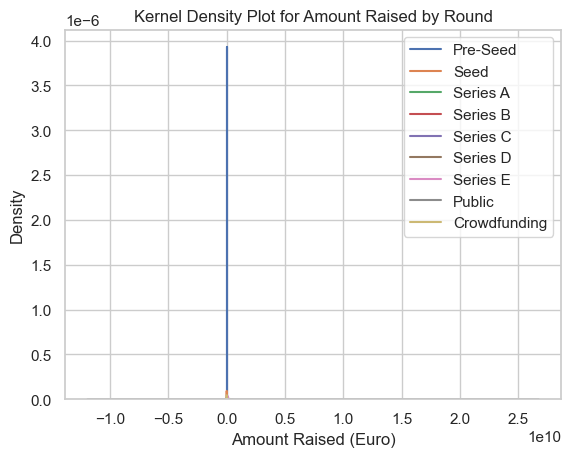

In [41]:
round_mapping = {'Pre-Seed': 0, 'Seed': 1, 'Series A': 2, 'Series B': 3, 'Series C': 4, 'Series D': 5, 'Series E': 6, 'Public': 7, 'Crowdfunding': 8, 'Debt Financing': 9}
# Group the DataFrame by 'Round' and create a KDE plot for each group
for round_value, group_data in df.groupby('Round'):
    sns.kdeplot(group_data['AmountRaisedEuro'], label=[key for key, value in round_mapping.items() if value == round_value][0])

# Set labels and title
plt.xlabel('Amount Raised (Euro)')
plt.ylabel('Density')
plt.title('Kernel Density Plot for Amount Raised by Round')

# Show a legend to distinguish different 'Round' values
plt.legend()

# Display the plot
plt.show()


In [42]:
df = df[df["Round"] != 7]

C:\Users\newlo\AppData\Local\Temp\ipykernel_10632\3377567836.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(group_data['AmountRaisedEuro'], label=[key for key, value in round_mapping.items() if value == round_value][0])


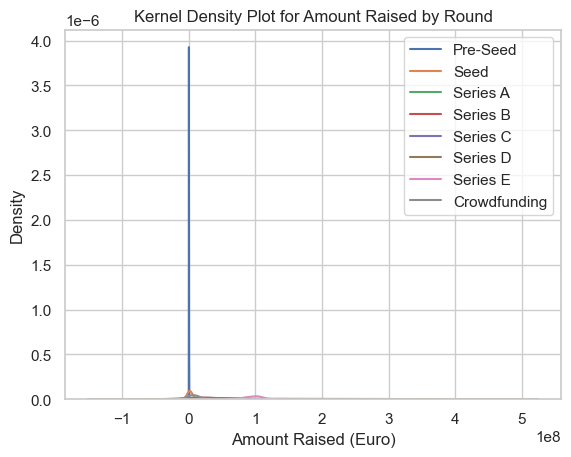

In [43]:
round_mapping = {'Pre-Seed': 0, 'Seed': 1, 'Series A': 2, 'Series B': 3, 'Series C': 4, 'Series D': 5, 'Series E': 6, 'Crowdfunding': 8, 'Debt Financing': 9} #'Public': 7
# Group the DataFrame by 'Round' and create a KDE plot for each group
for round_value, group_data in df.groupby('Round'):
    sns.kdeplot(group_data['AmountRaisedEuro'], label=[key for key, value in round_mapping.items() if value == round_value][0])

# Set labels and title
plt.xlabel('Amount Raised (Euro)')
plt.ylabel('Density')
plt.title('Kernel Density Plot for Amount Raised by Round')

# Show a legend to distinguish different 'Round' values
plt.legend()

# Display the plot
plt.show()

In [44]:
df_seed = df[df["Round"] == 0]
df_seed.head()

,Name,Description,Sector,Business,customer_B2B,customer_B2B2C,customer_B2C,customer_B2G,customer_C2C,Round,...,investor_SPAC,investor_VC,Year,City,State,Country,Geo_Lat,Geo_Long,Links,AmountRaisedEuro
53,Uber,Uber allows you to request a ride from your ph...,4,3,0,0,1,0,0,0,...,0,1,2008,San Francisco,California,United States,37.779026,-122.419906,"['https://www.uber.com/', 'https://www.crunchb...",212000.0
65,Albert,"Albert is harnessing the power of technology, ...",1,3,0,0,1,0,0,0,...,0,1,2015,Culver City,California,United States,34.021122,-118.396466,"['https://albert.com/', 'https://www.crunchbas...",132500.0
86,Blue Studios,"Blue Studios is a live-streaming platform, del...",2,1,0,0,1,0,0,0,...,0,1,2019,San Francisco,California,United States,37.779026,-122.419906,"['https://www.bluestudios.io/', 'https://www.c...",159000.0
88,Boon,Boon accelerates recruitment by engaging emplo...,3,0,1,0,0,0,0,0,...,0,0,2015,Los Angeles,California,United States,34.053691,-118.242766,"['https://goboon.co/', 'https://www.crunchbase...",106000.0
101,Contentools,Contentools is a software created for business...,3,0,1,0,0,0,0,0,...,0,0,2015,Florianópolis,Santa Catarina,Brazil,-27.597300,-48.549610,"['https://contentools.com/', 'https://www.crun...",318000.0


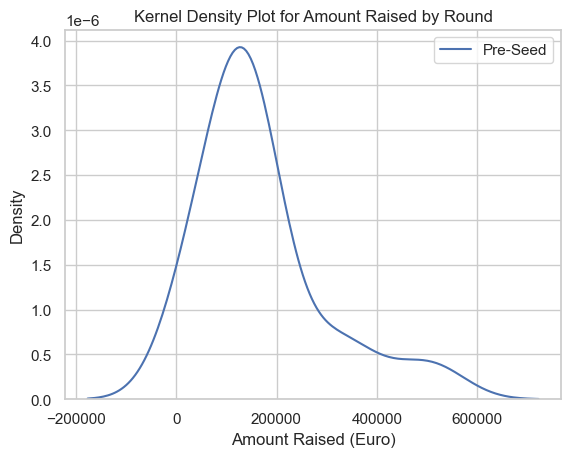

In [45]:
#round_mapping = {'Pre-Seed': 0, 'Seed': 1, 'Series A': 2, 'Series B': 3, 'Series C': 4, 'Series D': 5, 'Series E': 6, 'Crowdfunding': 8, 'Debt Financing': 9} #'Public': 7
# Group the DataFrame by 'Round' and create a KDE plot for each group
for round_value, group_data in df_seed.groupby('Round'):
    sns.kdeplot(group_data['AmountRaisedEuro'], label='Pre-Seed')

# Set labels and title
plt.xlabel('Amount Raised (Euro)')
plt.ylabel('Density')
plt.title('Kernel Density Plot for Amount Raised by Round')

# Show a legend to distinguish different 'Round' values
plt.legend()

# Display the plot
plt.show()

In [46]:
skewness = stats.skew(group_data['AmountRaisedEuro'])
kurtosis = stats.kurtosis(group_data['AmountRaisedEuro'])
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 1.4291687320593884
Kurtosis: 1.6204635573610835


* First exploration
5.9 meaning rightly skewed.
32.87 means leptokurtic (long tails, huge outliers)
* Second exploration
Skewness: 1.53, rightly skewed.
Kurtosis: 1.27, less peaked than a normal distribution
* third exploration
Skewness: 1.43, rightly skewed.
Kurtosis: 1.62, less peaked than a normal distribution

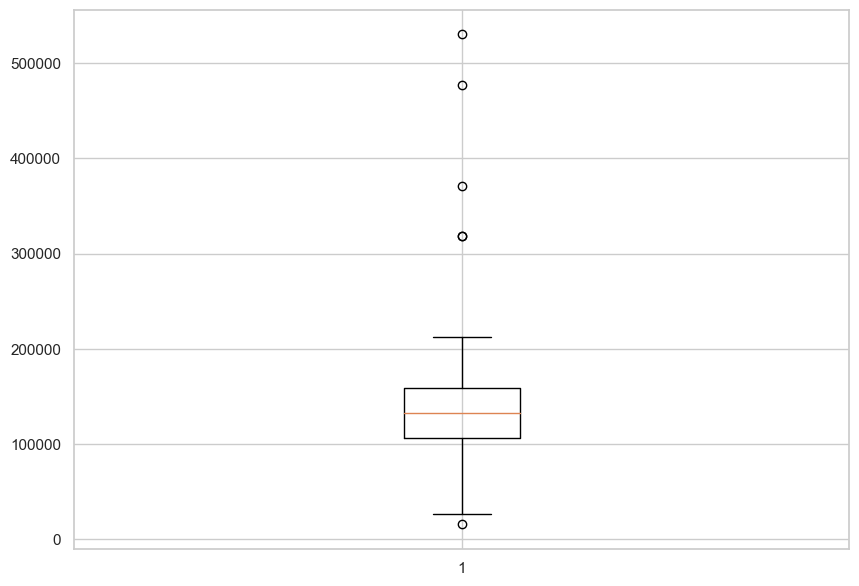

In [47]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(group_data['AmountRaisedEuro'])
 
# show plot
plt.show()

In [48]:
#outliers
# we have two outliers that is skewing our data we can remove using IQR
Q1 = group_data['AmountRaisedEuro'].quantile(0.25)
Q3 = group_data['AmountRaisedEuro'].quantile(0.75)

IQR = Q3 - Q1

#isolate the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (group_data['AmountRaisedEuro'] < lower_bound) | (group_data['AmountRaisedEuro'] > upper_bound)
outliers_df = group_data[outliers]

In [49]:
print(len(outliers_df))
outliers_df.head()

6


,Name,Description,Sector,Business,customer_B2B,customer_B2B2C,customer_B2C,customer_B2G,customer_C2C,Round,...,investor_SPAC,investor_VC,Year,City,State,Country,Geo_Lat,Geo_Long,Links,AmountRaisedEuro
101,Contentools,Contentools is a software created for business...,3,0,1,0,0,0,0,0,...,0,0,2015,Florianópolis,Santa Catarina,Brazil,-27.597300,-48.549610,"['https://contentools.com/', 'https://www.crun...",318000.0
148,Manpacks,Manpacks is a menâs subscription service del...,5,1,0,0,1,0,0,0,...,0,0,2011,Providence,Rhode Island,United States,41.823989,-71.412834,"['#', 'https://www.crunchbase.com/organization...",15900.0
153,MedStack,MedStack delivers patient-facing healthcare ap...,3,0,1,0,0,0,0,0,...,0,0,2017,Toronto,Ontario,Canada,43.653482,-79.383935,"['https://medstack.co/', 'https://www.crunchba...",477000.0
160,Mycroft,Mycroft offers a suite of open source technolo...,3,0,1,0,0,0,0,0,...,0,0,2016,Kansas City,Missouri,United States,39.100105,-94.578142,"['https://mycroft.ai/', 'https://www.crunchbas...",371000.0
202,StackShare,StackShare is the way for developers to discov...,3,0,1,0,1,0,0,0,...,0,1,2015,San Francisco,California,United States,37.779026,-122.419906,"['stackshare.io', 'https://www.crunchbase.com/...",318000.0


In [50]:
#remove outliers
#group_data_no_outliers = group_data[~outliers]

#fig = plt.figure(figsize=(10, 7))
#plt.boxplot(group_data_no_outliers['AmountRaisedEuro'])
#plt.show()
df.head()

,Name,Description,Sector,Business,customer_B2B,customer_B2B2C,customer_B2C,customer_B2G,customer_C2C,Round,...,investor_SPAC,investor_VC,Year,City,State,Country,Geo_Lat,Geo_Long,Links,AmountRaisedEuro
0,Airbnb,Airbnb is an online marketplace for people to ...,2,1,1,0,1,0,0,1,...,0,1,2008,San Francisco,California,United States,37.779026,-122.419906,"['https://airbnb.com/', 'https://www.crunchbas...",636000.0
1,Alan,Alan is a platform that uses technology to mak...,1,3,1,0,0,0,0,4,...,0,1,2020,Paris,Ile-de-France,France,48.853495,2.348391,"['https://alan.com/', 'https://www.crunchbase....",57240000.0
2,Apptopia,Apptopia serves the mobile industry with an ar...,0,1,1,0,0,0,0,2,...,0,1,2018,Boston,Massachusetts,United States,42.355433,-71.060511,"['http://www.apptopia.com/', 'https://www.crun...",1547600.0
3,Beatdapp,Beatdapp provides real-time tracking of media ...,3,0,1,0,0,0,0,1,...,0,1,2019,Vancouver,British Columbia,Canada,49.260872,-123.113952,"['https://beatdapp.com/', 'https://www.crunchb...",2544000.0
4,Bind,"Bind provides personalized, cost-transparent a...",5,1,1,0,1,0,0,2,...,0,1,2018,Minneapolis,Minnesota,United States,44.977300,-93.265469,"['https://www.yourbind.com/', 'https://www.cru...",63600000.0


## Statistical Tests

In [51]:
print(df.columns)

Index(['Name', 'Description', 'Sector', 'Business', 'customer_B2B',
       'customer_B2B2C', 'customer_B2C', 'customer_B2G', 'customer_C2C',
       'Round', 'investor_Accelerator', 'investor_Angels',
       'investor_Corporate', 'investor_Crowdfunding', 'investor_SPAC',
       'investor_VC', 'Year', 'City', 'State', 'Country', 'Geo_Lat',
       'Geo_Long', 'Links', 'AmountRaisedEuro'],
      dtype='object')


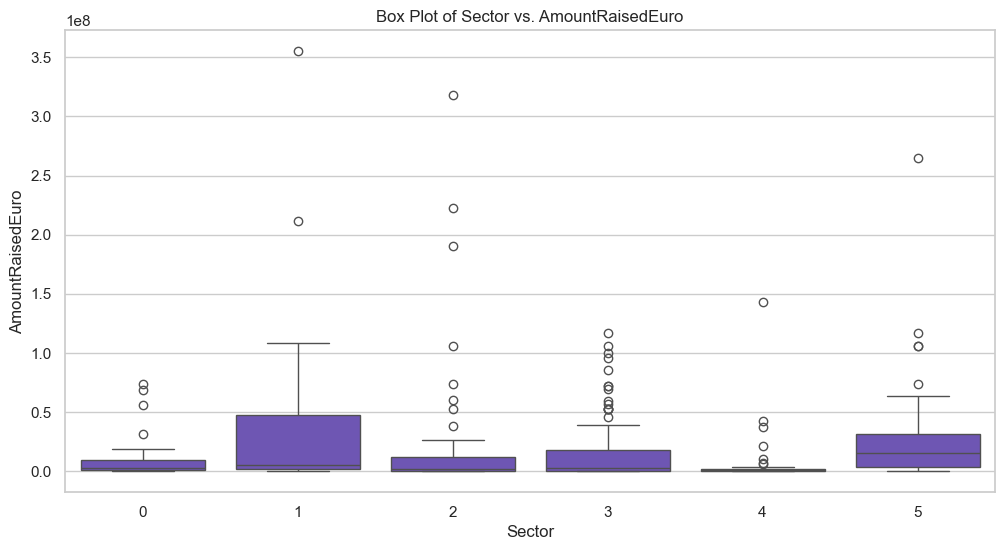

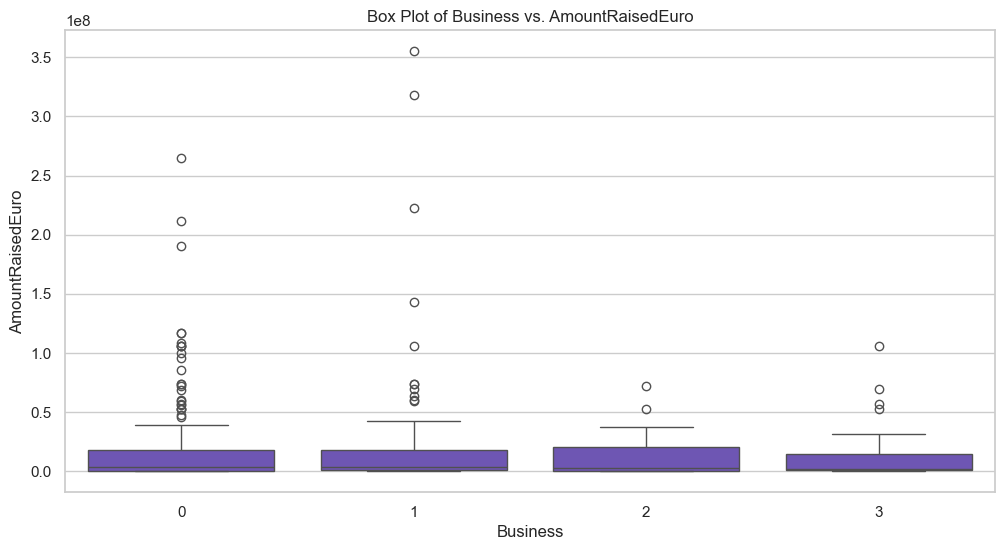

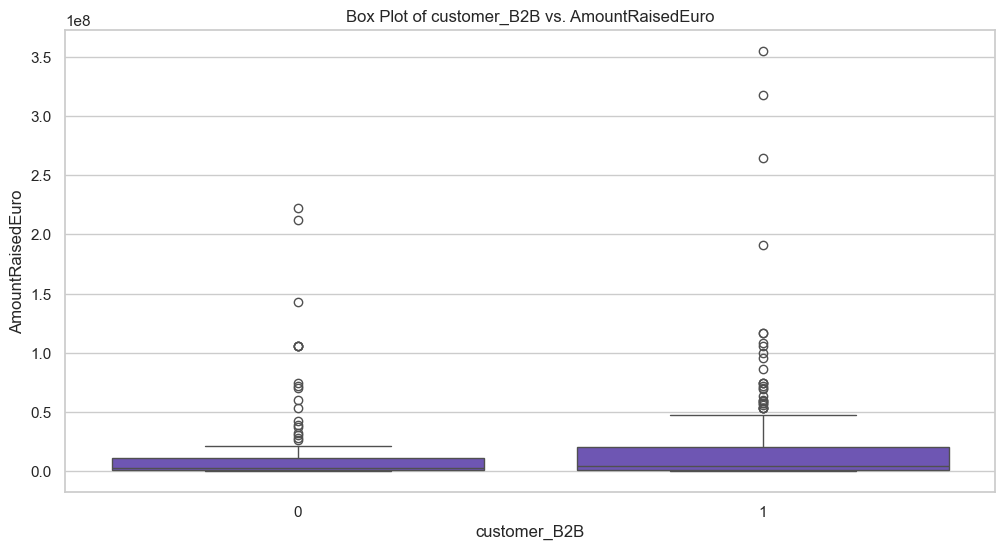

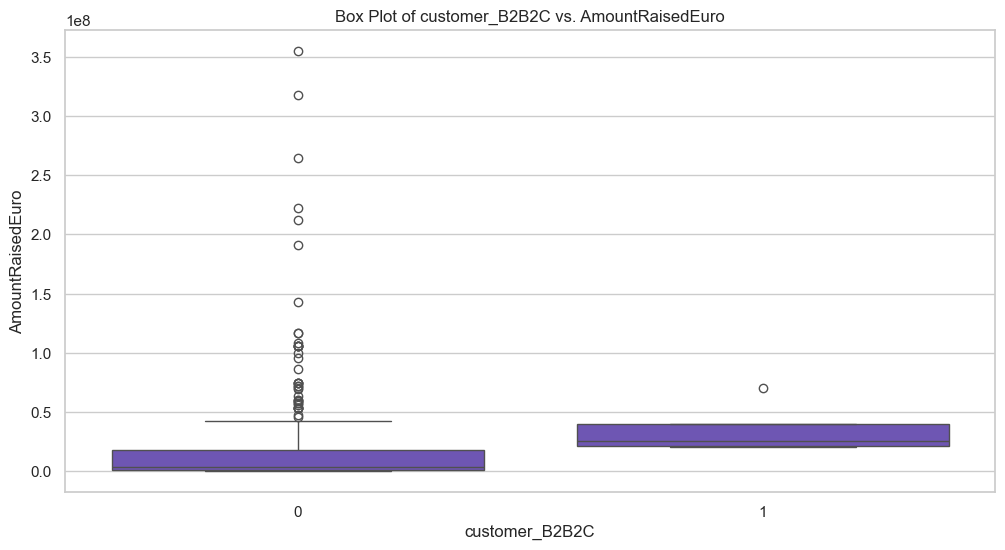

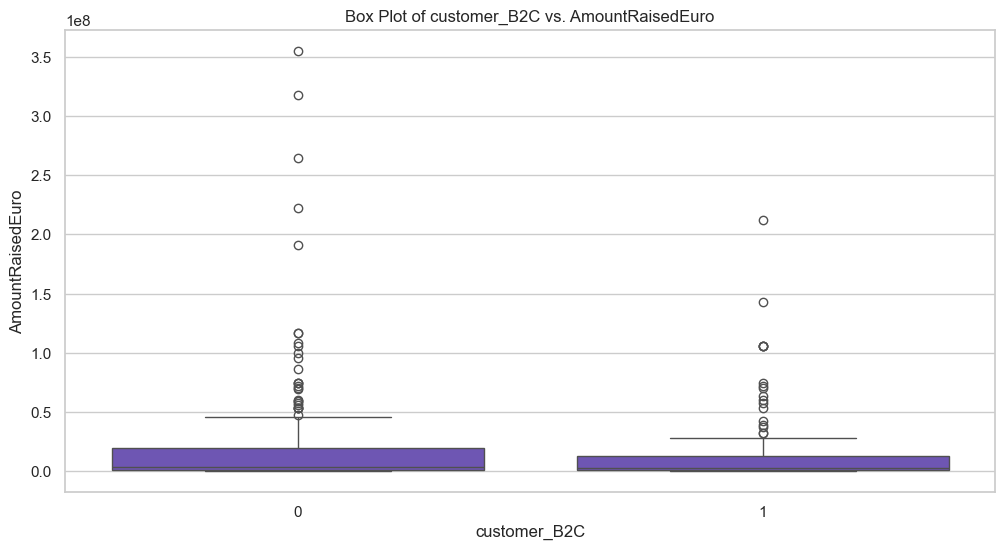

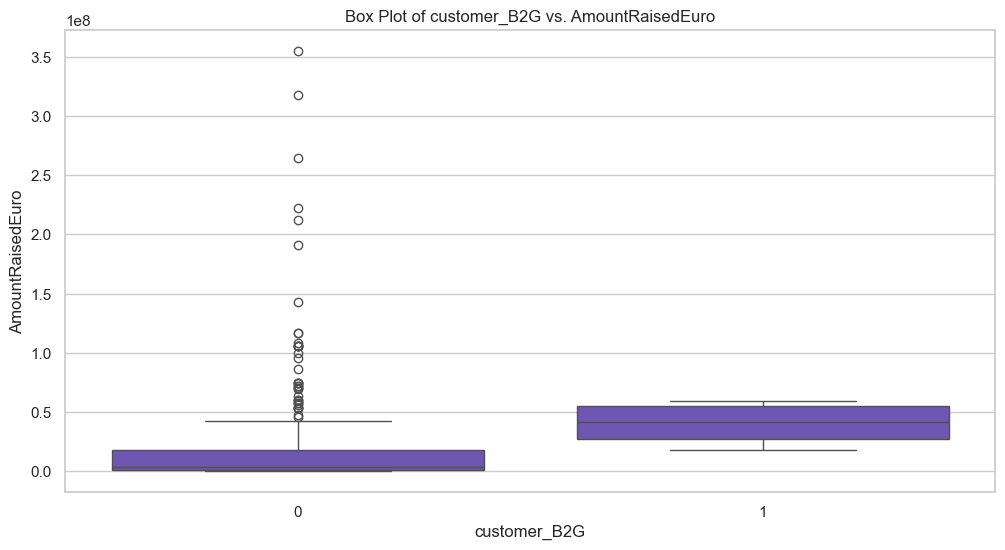

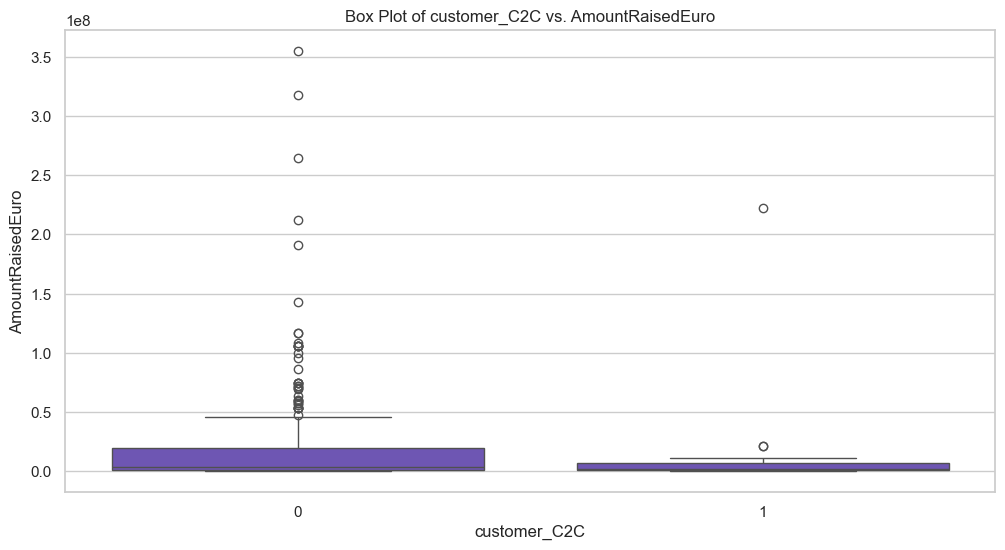

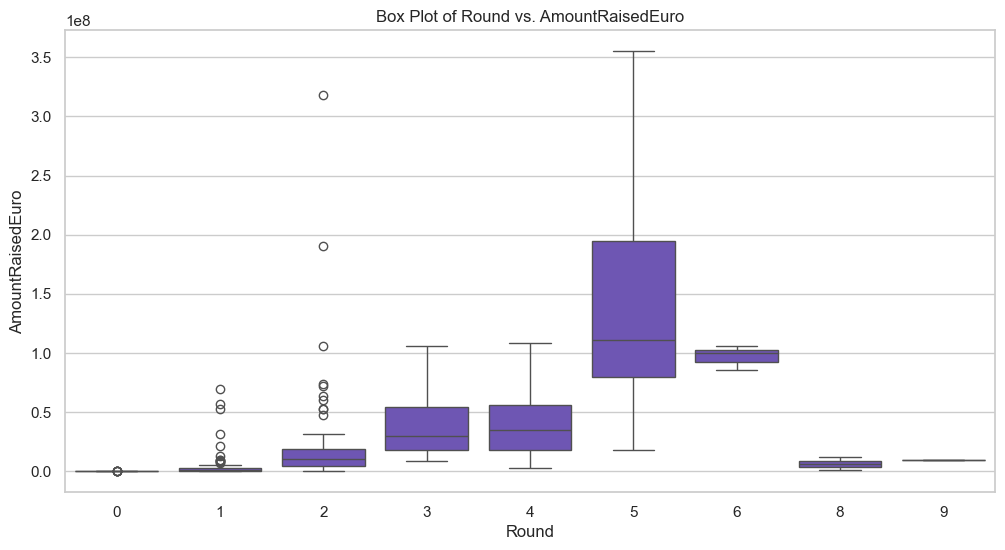

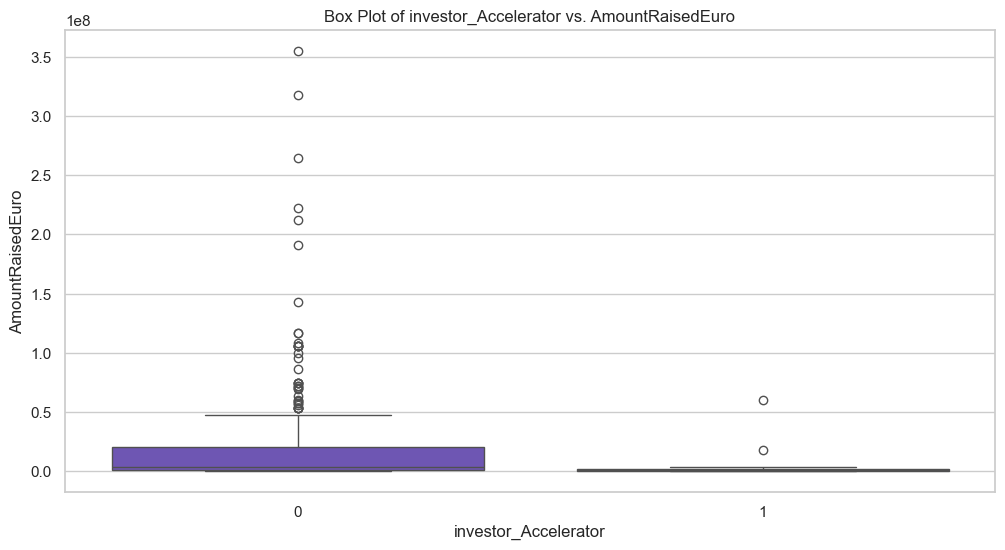

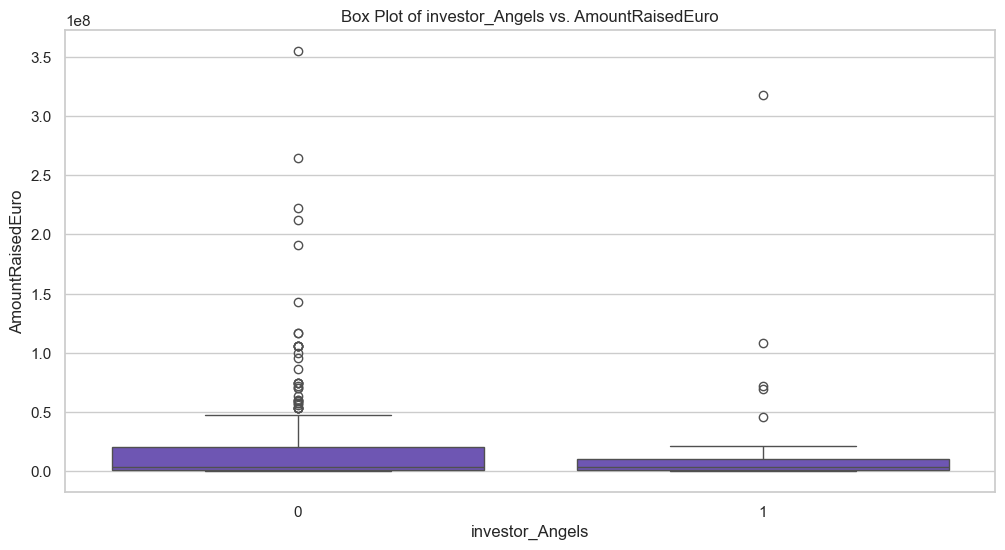

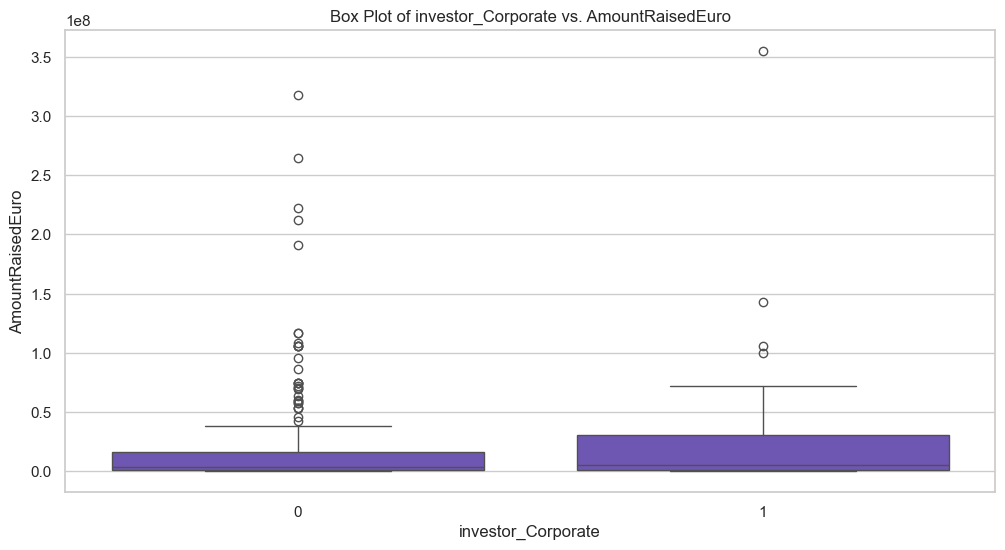

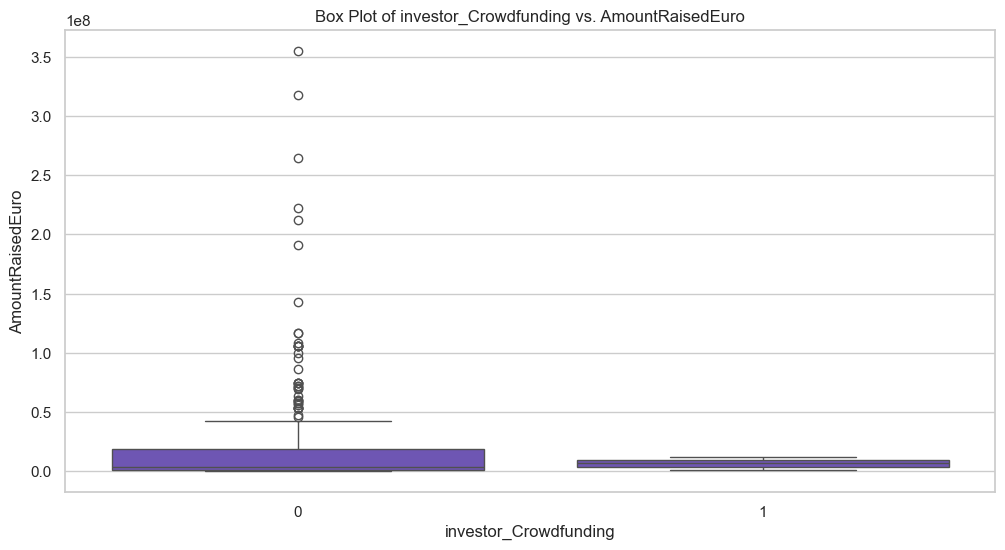

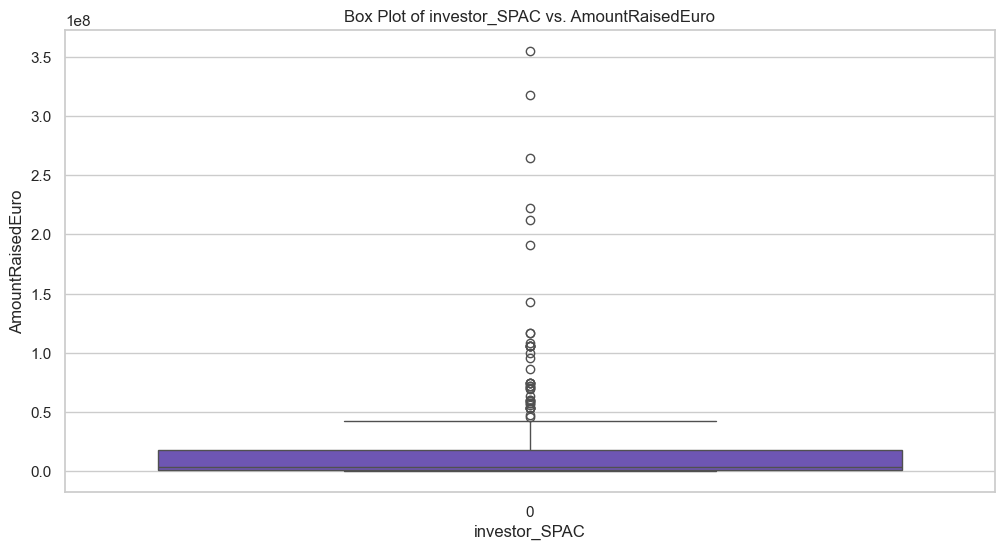

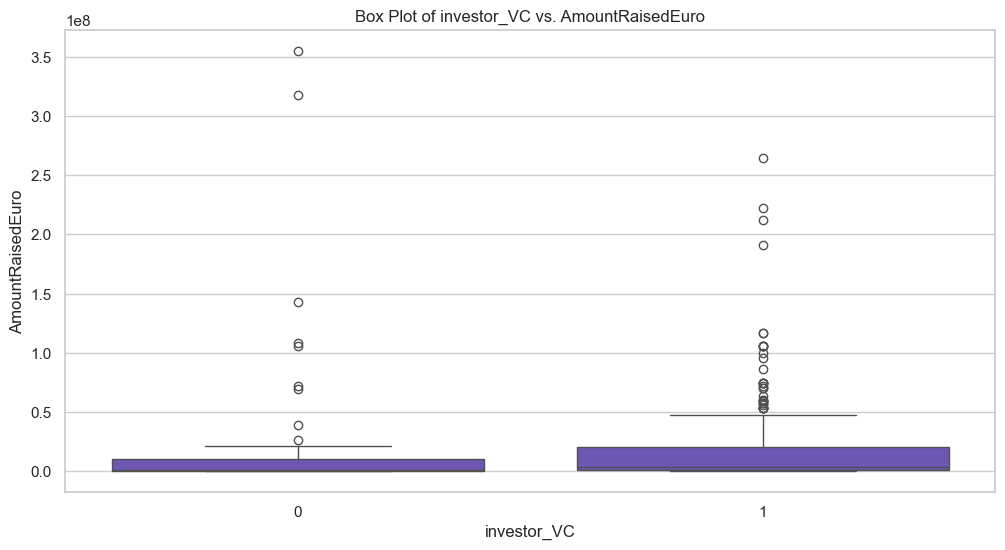

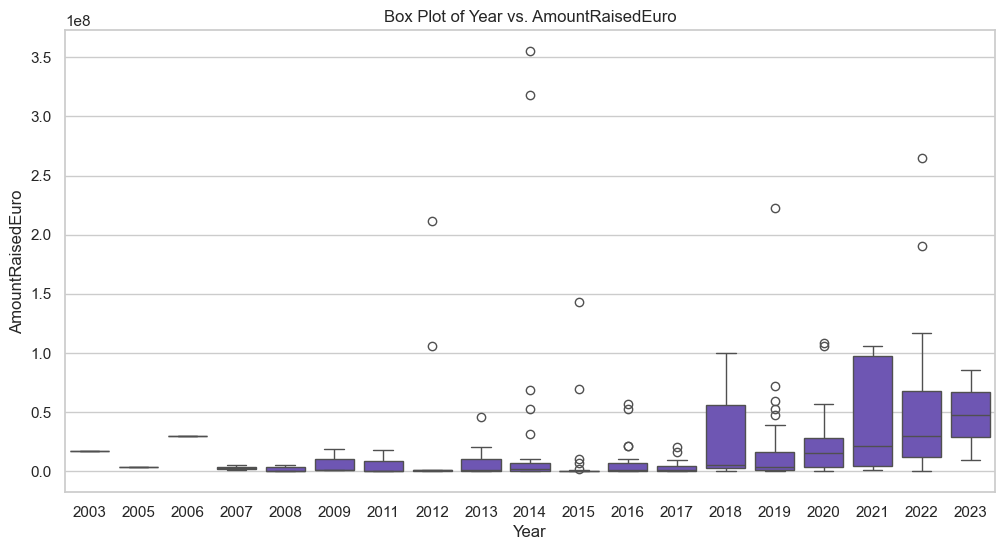

In [52]:
#sns.boxplot(x='Round', y='AmountRaisedEuro', data=df)
#plt.show()

order = ['Sector', 'Business', 'customer_B2B', 'customer_B2B2C', 'customer_B2C', 'customer_B2G', 'customer_C2C',
         'Round', 'investor_Accelerator', 'investor_Angels', 'investor_Corporate', 'investor_Crowdfunding',
         'investor_SPAC', 'investor_VC', 'Year']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot for each categorical variable
for x_var in order:
    plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
    sns.boxplot(x=x_var, y='AmountRaisedEuro', data=df, color='#6647c3')
    plt.title(f'Box Plot of {x_var} vs. AmountRaisedEuro')
    plt.show()

In [53]:
binary_variable = df['Round']
continuous_variable = df['AmountRaisedEuro']

# Calculate means for the two groups
mean_1 = np.mean(continuous_variable[binary_variable == 1])
mean_0 = np.mean(continuous_variable[binary_variable == 0])

# Calculate pooled standard deviation
std_1 = np.std(continuous_variable[binary_variable == 1], ddof=1)
std_0 = np.std(continuous_variable[binary_variable == 0], ddof=1)
pooled_std = np.sqrt(((std_1 ** 2) + (std_0 ** 2)) / 2)

# Calculate point-biserial correlation coefficient
point_biserial_corr, _ = stats.pointbiserialr(binary_variable, continuous_variable)

print(f"Point-Biserial Correlation Coefficient: {point_biserial_corr}")

Point-Biserial Correlation Coefficient: 0.5248942430254254


In [54]:
order = ['Sector', 'Business', 'customer_B2B', 'customer_B2B2C', 'customer_B2C', 'customer_B2G', 'customer_C2C',
         'Round', 'investor_Accelerator', 'investor_Angels', 'investor_Corporate', 'investor_Crowdfunding',
         'investor_SPAC', 'investor_VC', 'Year']

# Assuming 'AmountRaisedEuro' is the continuous variable
continuous_variable = df['AmountRaisedEuro']

# Iterate through each variable in the order list
for binary_var in order:
    # Assume that binary_var is a binary variable (0 or 1) in your DataFrame
    binary_variable = df[binary_var]
    
    # Calculate means for the two groups
    mean_1 = np.mean(continuous_variable[binary_variable == 1])
    mean_0 = np.mean(continuous_variable[binary_variable == 0])

    # Calculate pooled standard deviation
    std_1 = np.std(continuous_variable[binary_variable == 1], ddof=1)
    std_0 = np.std(continuous_variable[binary_variable == 0], ddof=1)
    pooled_std = np.sqrt(((std_1 ** 2) + (std_0 ** 2)) / 2)

    # Calculate point-biserial correlation coefficient
    point_biserial_corr, _ = stats.pointbiserialr(binary_variable, continuous_variable)

    print(f"Variable: {binary_var}")
    print(f"Point-Biserial Correlation Coefficient: {point_biserial_corr}")
    print("----")

Variable: Sector
Point-Biserial Correlation Coefficient: 0.004017549216195342
----
Variable: Business
Point-Biserial Correlation Coefficient: -0.06732827460714058
----
Variable: customer_B2B
Point-Biserial Correlation Coefficient: 0.057503348763727265
----
Variable: customer_B2B2C
Point-Biserial Correlation Coefficient: 0.03888616872068398
----
Variable: customer_B2C
Point-Biserial Correlation Coefficient: -0.05644334591455406
----
Variable: customer_B2G
Point-Biserial Correlation Coefficient: 0.05139042564069519
----
Variable: customer_C2C
Point-Biserial Correlation Coefficient: -0.030148090122319355
----
Variable: Round
Point-Biserial Correlation Coefficient: 0.5248942430254254
----
Variable: investor_Accelerator
Point-Biserial Correlation Coefficient: -0.11458724855556622
----
Variable: investor_Angels
Point-Biserial Correlation Coefficient: -0.0399423954932608
----
Variable: investor_Corporate
Point-Biserial Correlation Coefficient: 0.059285800178185646
----
Variable: investor_Crow

d:\Projects\repos\pitchedit\venv_pitchedit\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


* For most variables, the correlation with 'AmountRaisedEuro' is weak, indicating a limited linear relationship.
* 'Round' and 'Year' show stronger correlations, suggesting more significant linear relationships with 'AmountRaisedEuro.'

In [55]:
# Text preprocessing and vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500)  # Adjust parameters as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Description'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF DataFrame with the original DataFrame
df_concatenated = pd.concat([df, tfidf_df], axis=1)

# Handle NaN values by filling them with zeros
df_concatenated = df_concatenated.fillna(0)

# Calculate Pearson correlation between each word and 'AmountRaisedEuro'
correlations = {}
for word in tfidf_df.columns:
    correlation, _ = pearsonr(df_concatenated[word], df_concatenated['AmountRaisedEuro'])
    correlations[word] = correlation

# Convert the results to a DataFrame for easier analysis
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Word', 'Correlation'])
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)



In [56]:
# Display the top correlated words
print(correlation_df.head(10))

           Word  Correlation
478     virtual     0.340657
474       value     0.338674
30        award     0.310560
338   potential     0.255482
481          vr     0.221613
84     consumer     0.215492
448  technology     0.208148
218       ideas     0.204262
154      engage     0.192117
252     leading     0.178622


# Amount Raised

In [57]:
# Assuming your DataFrame is named df
quartiles = df['AmountRaisedEuro'].quantile([0.25, 0.5, 0.75])

print("Q1 (25th percentile):", quartiles[0.25])
print("Q2 (50th percentile, median):", quartiles[0.5])
print("Q3 (75th percentile):", quartiles[0.75])
max_value = df['AmountRaisedEuro'].max()
print("Q3 (Max Value):", max_value)

Q1 (25th percentile): 636000.0
Q2 (50th percentile, median): 3180000.0
Q3 (75th percentile): 18020000.0
Q3 (Max Value): 355100000.0


In [58]:
# Calculate the order of magnitude for each value
df['OrderOfMagnitude'] = np.floor(np.log10(df['AmountRaisedEuro']))

# Count the occurrences of each order of magnitude
magnitude_counts = df['OrderOfMagnitude'].value_counts().sort_index()

# Print the results
print("Counts for each order of magnitude:")
print(magnitude_counts)

#4=ten thousand
#5=one hundred thousand
#6=one million
#7=ten million
#8=one hundred million

Counts for each order of magnitude:
OrderOfMagnitude
4.0     12
5.0     72
6.0    100
7.0     83
8.0     15
Name: count, dtype: int64


In [59]:
mag_df = df[df['OrderOfMagnitude'] == 5]
mag_df.head()

,Name,Description,Sector,Business,customer_B2B,customer_B2B2C,customer_B2C,customer_B2G,customer_C2C,Round,...,investor_VC,Year,City,State,Country,Geo_Lat,Geo_Long,Links,AmountRaisedEuro,OrderOfMagnitude
0,Airbnb,Airbnb is an online marketplace for people to ...,2,1,1,0,1,0,0,1,...,1,2008,San Francisco,California,United States,37.779026,-122.419906,"['https://airbnb.com/', 'https://www.crunchbas...",636000.0,5.0
12,Coinbase,Coinbase is a digital currency exchange that a...,2,1,0,0,1,0,0,1,...,1,2012,San Francisco,California,United States,37.779026,-122.419906,"['https://coinbase.com/', 'https://www.crunchb...",636000.0,5.0
25,Intercom,Intercom is a customer engagement platform tha...,3,0,1,0,0,0,0,1,...,1,2012,San Francisco,California,United States,37.779026,-122.419906,"['https://www.intercom.com/', 'https://www.cru...",636000.0,5.0
36,Peloton,Peloton combines real-time and on-demand studi...,2,2,0,0,1,0,0,1,...,0,2012,New York,New York,United States,40.712728,-74.006015,"['https://www.onepeloton.com/', 'https://www.c...",424000.0,5.0
40,SendGrid,SendGrid is the leading cloud-based email mark...,0,0,1,0,0,0,0,1,...,1,2009,Denver,Colorado,United States,39.739236,-104.984862,"['https://sendgrid.com', 'https://www.crunchba...",795000.0,5.0


In [60]:
df['OrderOfMagnitude'] = df['OrderOfMagnitude'].astype(int)
df.head()

,Name,Description,Sector,Business,customer_B2B,customer_B2B2C,customer_B2C,customer_B2G,customer_C2C,Round,...,investor_VC,Year,City,State,Country,Geo_Lat,Geo_Long,Links,AmountRaisedEuro,OrderOfMagnitude
0,Airbnb,Airbnb is an online marketplace for people to ...,2,1,1,0,1,0,0,1,...,1,2008,San Francisco,California,United States,37.779026,-122.419906,"['https://airbnb.com/', 'https://www.crunchbas...",636000.0,5
1,Alan,Alan is a platform that uses technology to mak...,1,3,1,0,0,0,0,4,...,1,2020,Paris,Ile-de-France,France,48.853495,2.348391,"['https://alan.com/', 'https://www.crunchbase....",57240000.0,7
2,Apptopia,Apptopia serves the mobile industry with an ar...,0,1,1,0,0,0,0,2,...,1,2018,Boston,Massachusetts,United States,42.355433,-71.060511,"['http://www.apptopia.com/', 'https://www.crun...",1547600.0,6
3,Beatdapp,Beatdapp provides real-time tracking of media ...,3,0,1,0,0,0,0,1,...,1,2019,Vancouver,British Columbia,Canada,49.260872,-123.113952,"['https://beatdapp.com/', 'https://www.crunchb...",2544000.0,6
4,Bind,"Bind provides personalized, cost-transparent a...",5,1,1,0,1,0,0,2,...,1,2018,Minneapolis,Minnesota,United States,44.977300,-93.265469,"['https://www.yourbind.com/', 'https://www.cru...",63600000.0,7


## Save CSV

In [61]:
# Save the updated DataFrame to a new CSV file or overwrite the original one
df.to_csv('data/falory_clean_exploration.csv', index=False)